In [1]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from matplotlib import gridspec
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

# filenames = glob('*.xml')
# filenames = str(filenames.sort())

filenames = ['20181206_clear_UV_def_Greiner96.xml']

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
print(reads)
    
label = 'ex280_scan_top_gain100'


[{'ex280_scan_top_gain100': {'A1': {'280': '3237502', '285': '2599651', '290': '2083584', '295': '1701532', '300': '1414632', '305': '645957', '310': '118042', '315': '109149', '320': '96526', '325': '83696', '330': '74036', '335': '58506', '340': '46825', '345': '37786', '350': '28269', '355': '21648', '360': '16499', '365': '13206', '370': '10801', '375': '8521', '380': '6425', '385': '4502', '390': '3554', '395': '2816', '400': '2449', '405': '1782', '410': '1926', '415': '1911', '420': '1846', '425': '1656', '430': '1773', '435': '1780', '440': '1963', '445': '2030', '450': '2081', '455': '1951', '460': '2058', '465': '2028', '470': '2037', '475': '2137', '480': '2136', '485': '2164', '490': '2197', '495': '2130', '500': '2061', '505': '2080', '510': '1958', '515': '1897', '520': '1818', '525': '1702', '530': '1612', '535': '1575', '540': '1482', '545': '1388', '550': '1339', '555': '1304', '560': '1211', '565': '1102', '570': '1025', '575': '925', '580': '845', '585': '784', '590'

### Plot data at all wavelengths

In [2]:
### use single well plotting script 

nrows = 2
ncols = 12
index = 0

title = 'Fluorescence Spectra Reads at 280 nm'

data = np.zeros([nrows, ncols, 1, 65], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = list(reads[0][label][well].values())
        for i in range(len(measurements)):
            measurements = list([x if x != 'OVER' else 0 for x in measurements])
            measurements = [float(i) for i in measurements]
        data[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(measurements)
     

A1
[3237502.0, 2599651.0, 2083584.0, 1701532.0, 1414632.0, 645957.0, 118042.0, 109149.0, 96526.0, 83696.0, 74036.0, 58506.0, 46825.0, 37786.0, 28269.0, 21648.0, 16499.0, 13206.0, 10801.0, 8521.0, 6425.0, 4502.0, 3554.0, 2816.0, 2449.0, 1782.0, 1926.0, 1911.0, 1846.0, 1656.0, 1773.0, 1780.0, 1963.0, 2030.0, 2081.0, 1951.0, 2058.0, 2028.0, 2037.0, 2137.0, 2136.0, 2164.0, 2197.0, 2130.0, 2061.0, 2080.0, 1958.0, 1897.0, 1818.0, 1702.0, 1612.0, 1575.0, 1482.0, 1388.0, 1339.0, 1304.0, 1211.0, 1102.0, 1025.0, 925.0, 845.0, 784.0, 713.0, 666.0, 636.0]
A2
[3367823.0, 2703272.0, 2343751.0, 1876739.0, 1519104.0, 819962.0, 136228.0, 131034.0, 115238.0, 94887.0, 80671.0, 58459.0, 45948.0, 35414.0, 26943.0, 20693.0, 16128.0, 12835.0, 9929.0, 7802.0, 5702.0, 4236.0, 3112.0, 2594.0, 2200.0, 1771.0, 1753.0, 1692.0, 1685.0, 1660.0, 1672.0, 1689.0, 1734.0, 1787.0, 1831.0, 1717.0, 1657.0, 1661.0, 1710.0, 1697.0, 1684.0, 1746.0, 1639.0, 1623.0, 1541.0, 1509.0, 1377.0, 1366.0, 1298.0, 1224.0, 1195.0, 1136.0

### Plot data at 480 nm

In [3]:
## Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

# didn't actually use protein in this experiment (12/06/2018)
# also used DMSO instead of Gef

Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index

    Bos_prot[well] = reads[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'B%s' % index
    Bos_buff[well] = reads[0]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Bos_iso_prot = np.zeros(12)
Bos_iso_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_iso_prot[well] = reads[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_iso_buff[well] = reads[0]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot = np.zeros(12)
Erl_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot[well] = reads[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Erl_buff[well] = reads[0]['ex280_scan_top_gain100'][buff_well_name]['480']

Gef_prot = np.zeros(12)
Gef_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'G%s' % index
    Gef_prot[well] = reads[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'H%s' % index
    Gef_buff[well] = reads[0]['ex280_scan_top_gain100'][buff_well_name]['480']
    print(prot_well_name)
    print(Gef_prot)
    print(buff_well_name)
    print(Gef_buff)
    

G1
[224.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
H1
[239.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
G2
[224. 225.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
H2
[239. 227.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
G3
[224. 225. 210.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
H3
[239. 227. 277.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
G4
[224. 225. 210. 285.   0.   0.   0.   0.   0.   0.   0.   0.]
H4
[239. 227. 277. 251.   0.   0.   0.   0.   0.   0.   0.   0.]
G5
[224. 225. 210. 285. 266.   0.   0.   0.   0.   0.   0.   0.]
H5
[239. 227. 277. 251. 239.   0.   0.   0.   0.   0.   0.   0.]
G6
[224. 225. 210. 285. 266. 215.   0.   0.   0.   0.   0.   0.]
H6
[239. 227. 277. 251. 239. 286.   0.   0.   0.   0.   0.   0.]
G7
[224. 225. 210. 285. 266. 215. 219.   0.   0.   0.   0.   0.]
H7
[ 239.  227.  277.  251.  239.  286. 1321.    0.    0.    0.    0.    0.]
G8
[224. 225. 210. 285. 266. 215. 219. 236.   0.   0.   0.   0.]
H8
[ 239.  22

# Logx plot

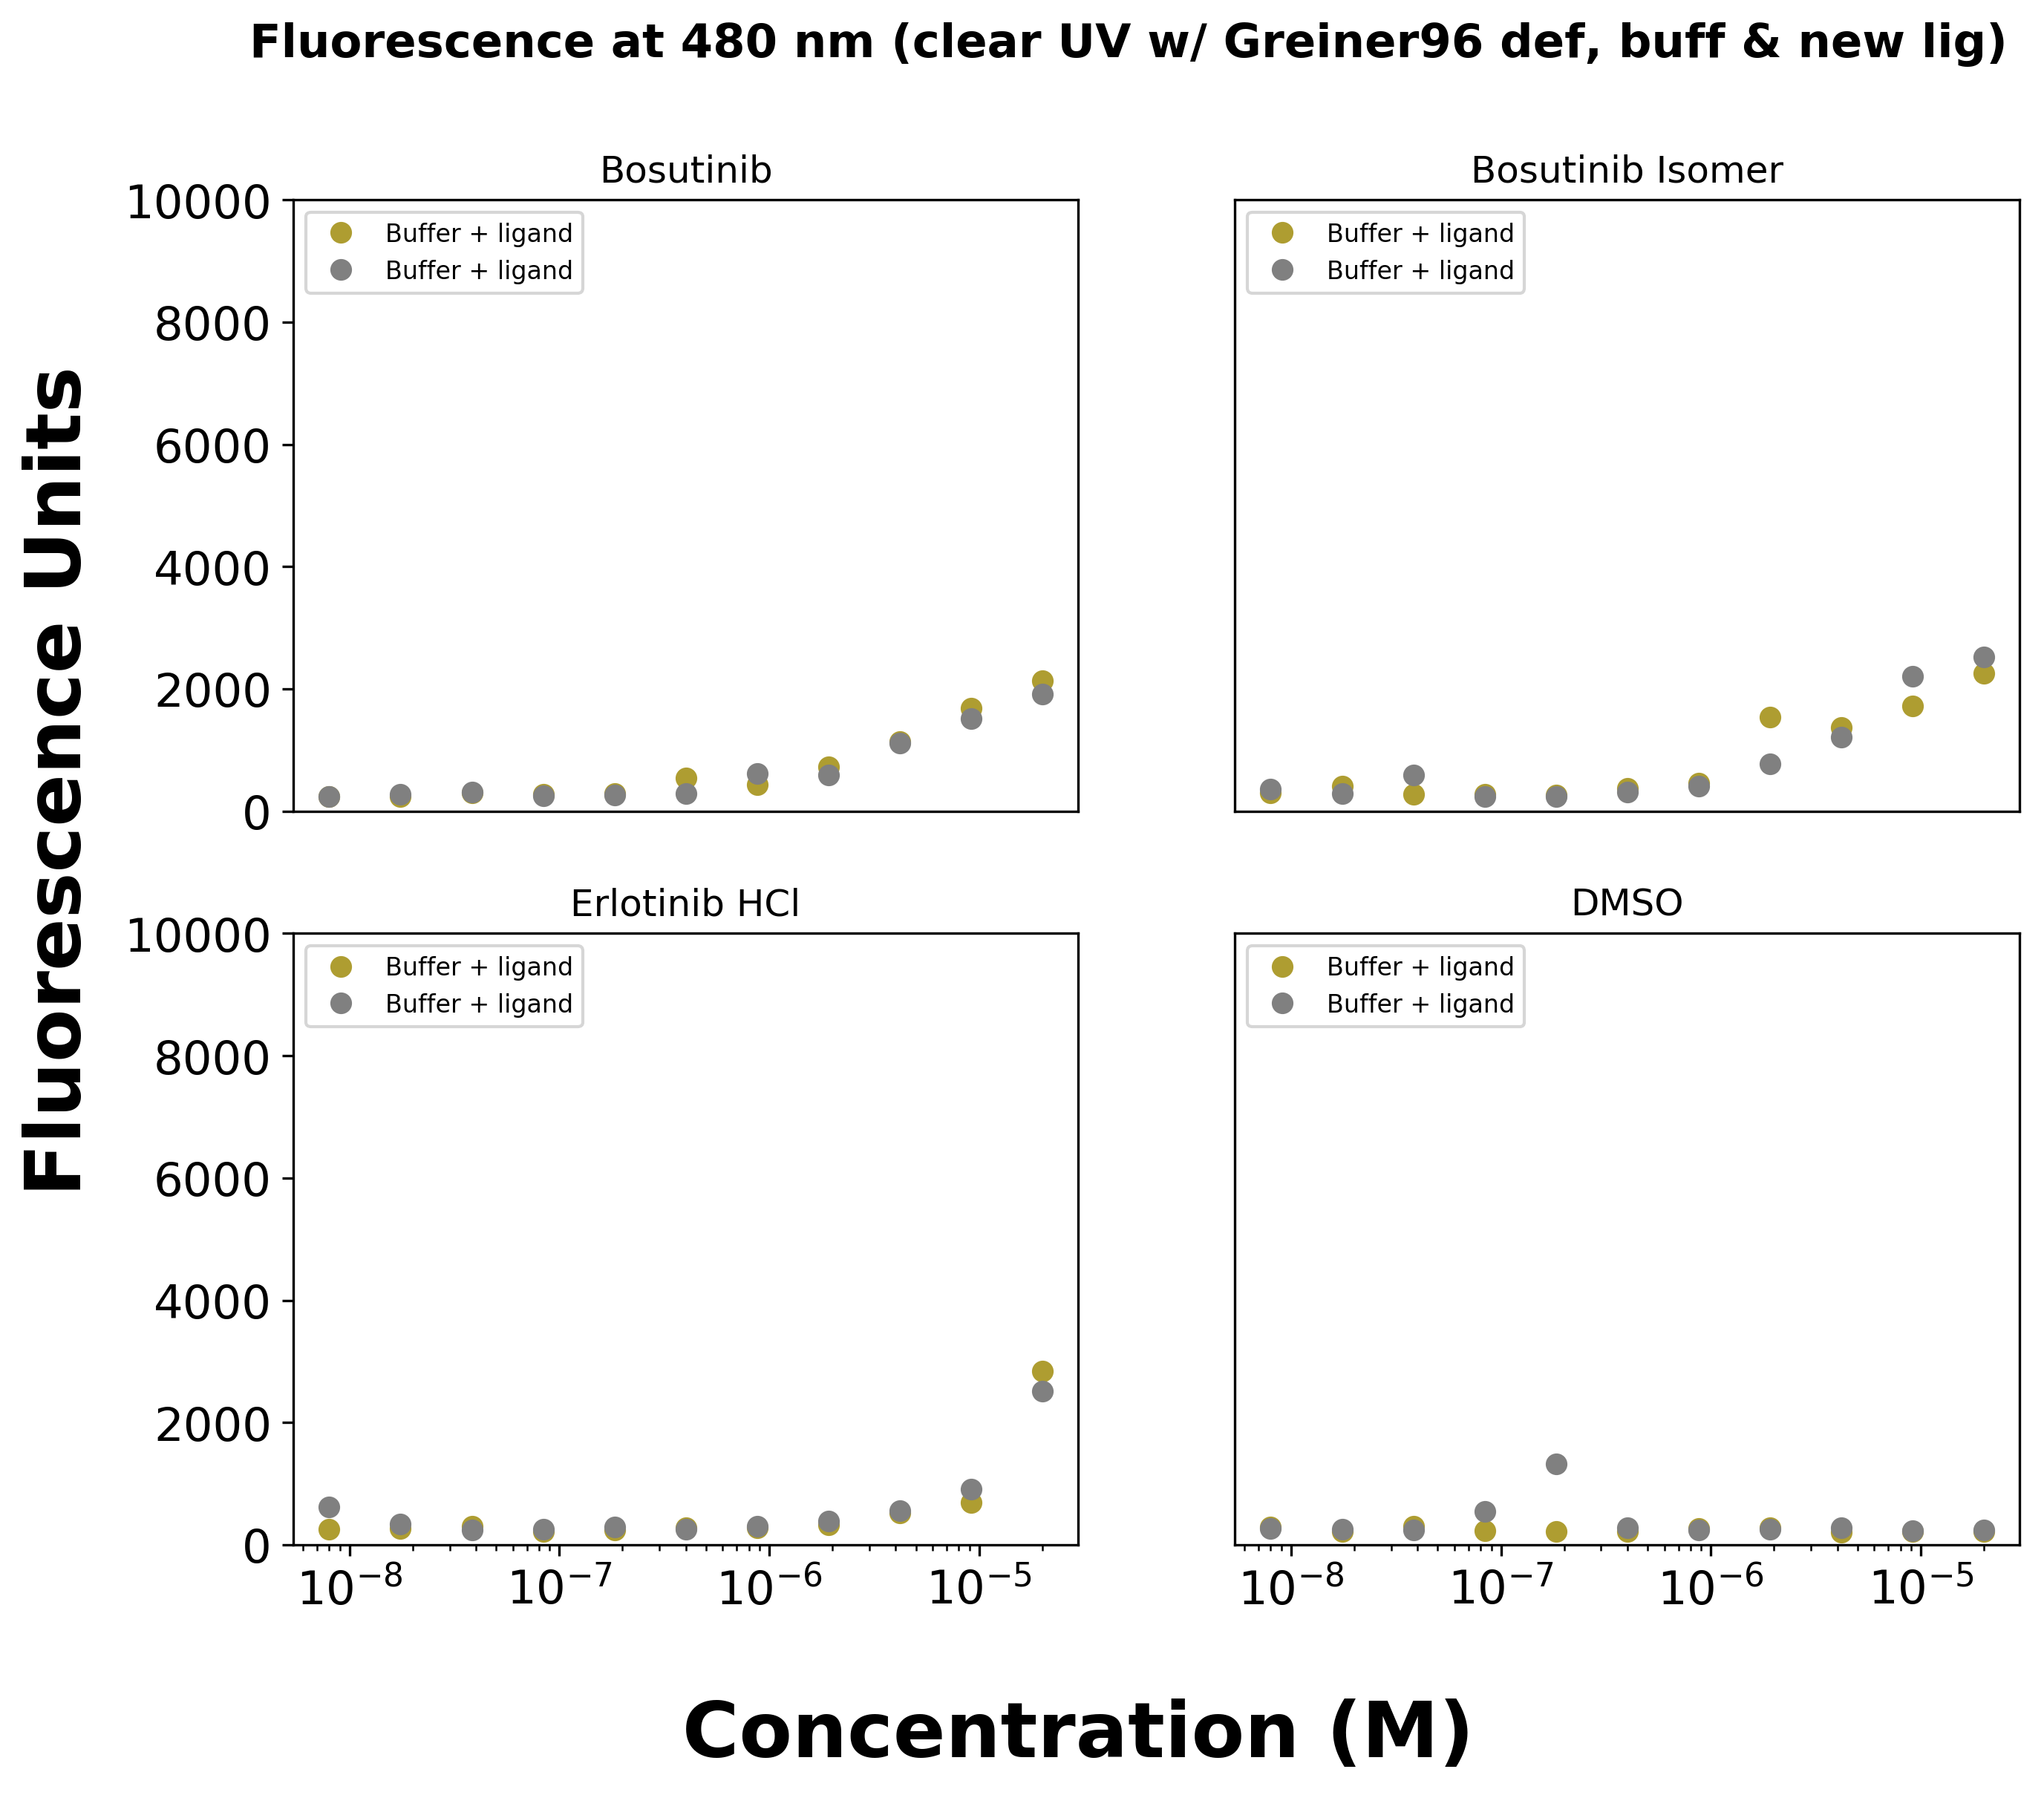

In [4]:
## make 4 plots, one for each ligand at 480 nm Em
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[2]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (clear UV w/ Greiner96 def, buff & new lig)', fontsize=15, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 10000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 10000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
# Plot fluorescence
plt.semilogx(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 10000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)
    

# Plot fluorescence
ax1 = fig.add_subplot(2,2,4)
plt.semilogx(concentrations, np.flip(Gef_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Gef_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 10000)
ax1.yaxis.set_ticks([])

ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('DMSO')
    


fig.savefig('20181206_clear_UV_Greiner96_def_buffer_new_lig_logx_%s.pdf' % wavelength, dpi=300)

# Log Log plot


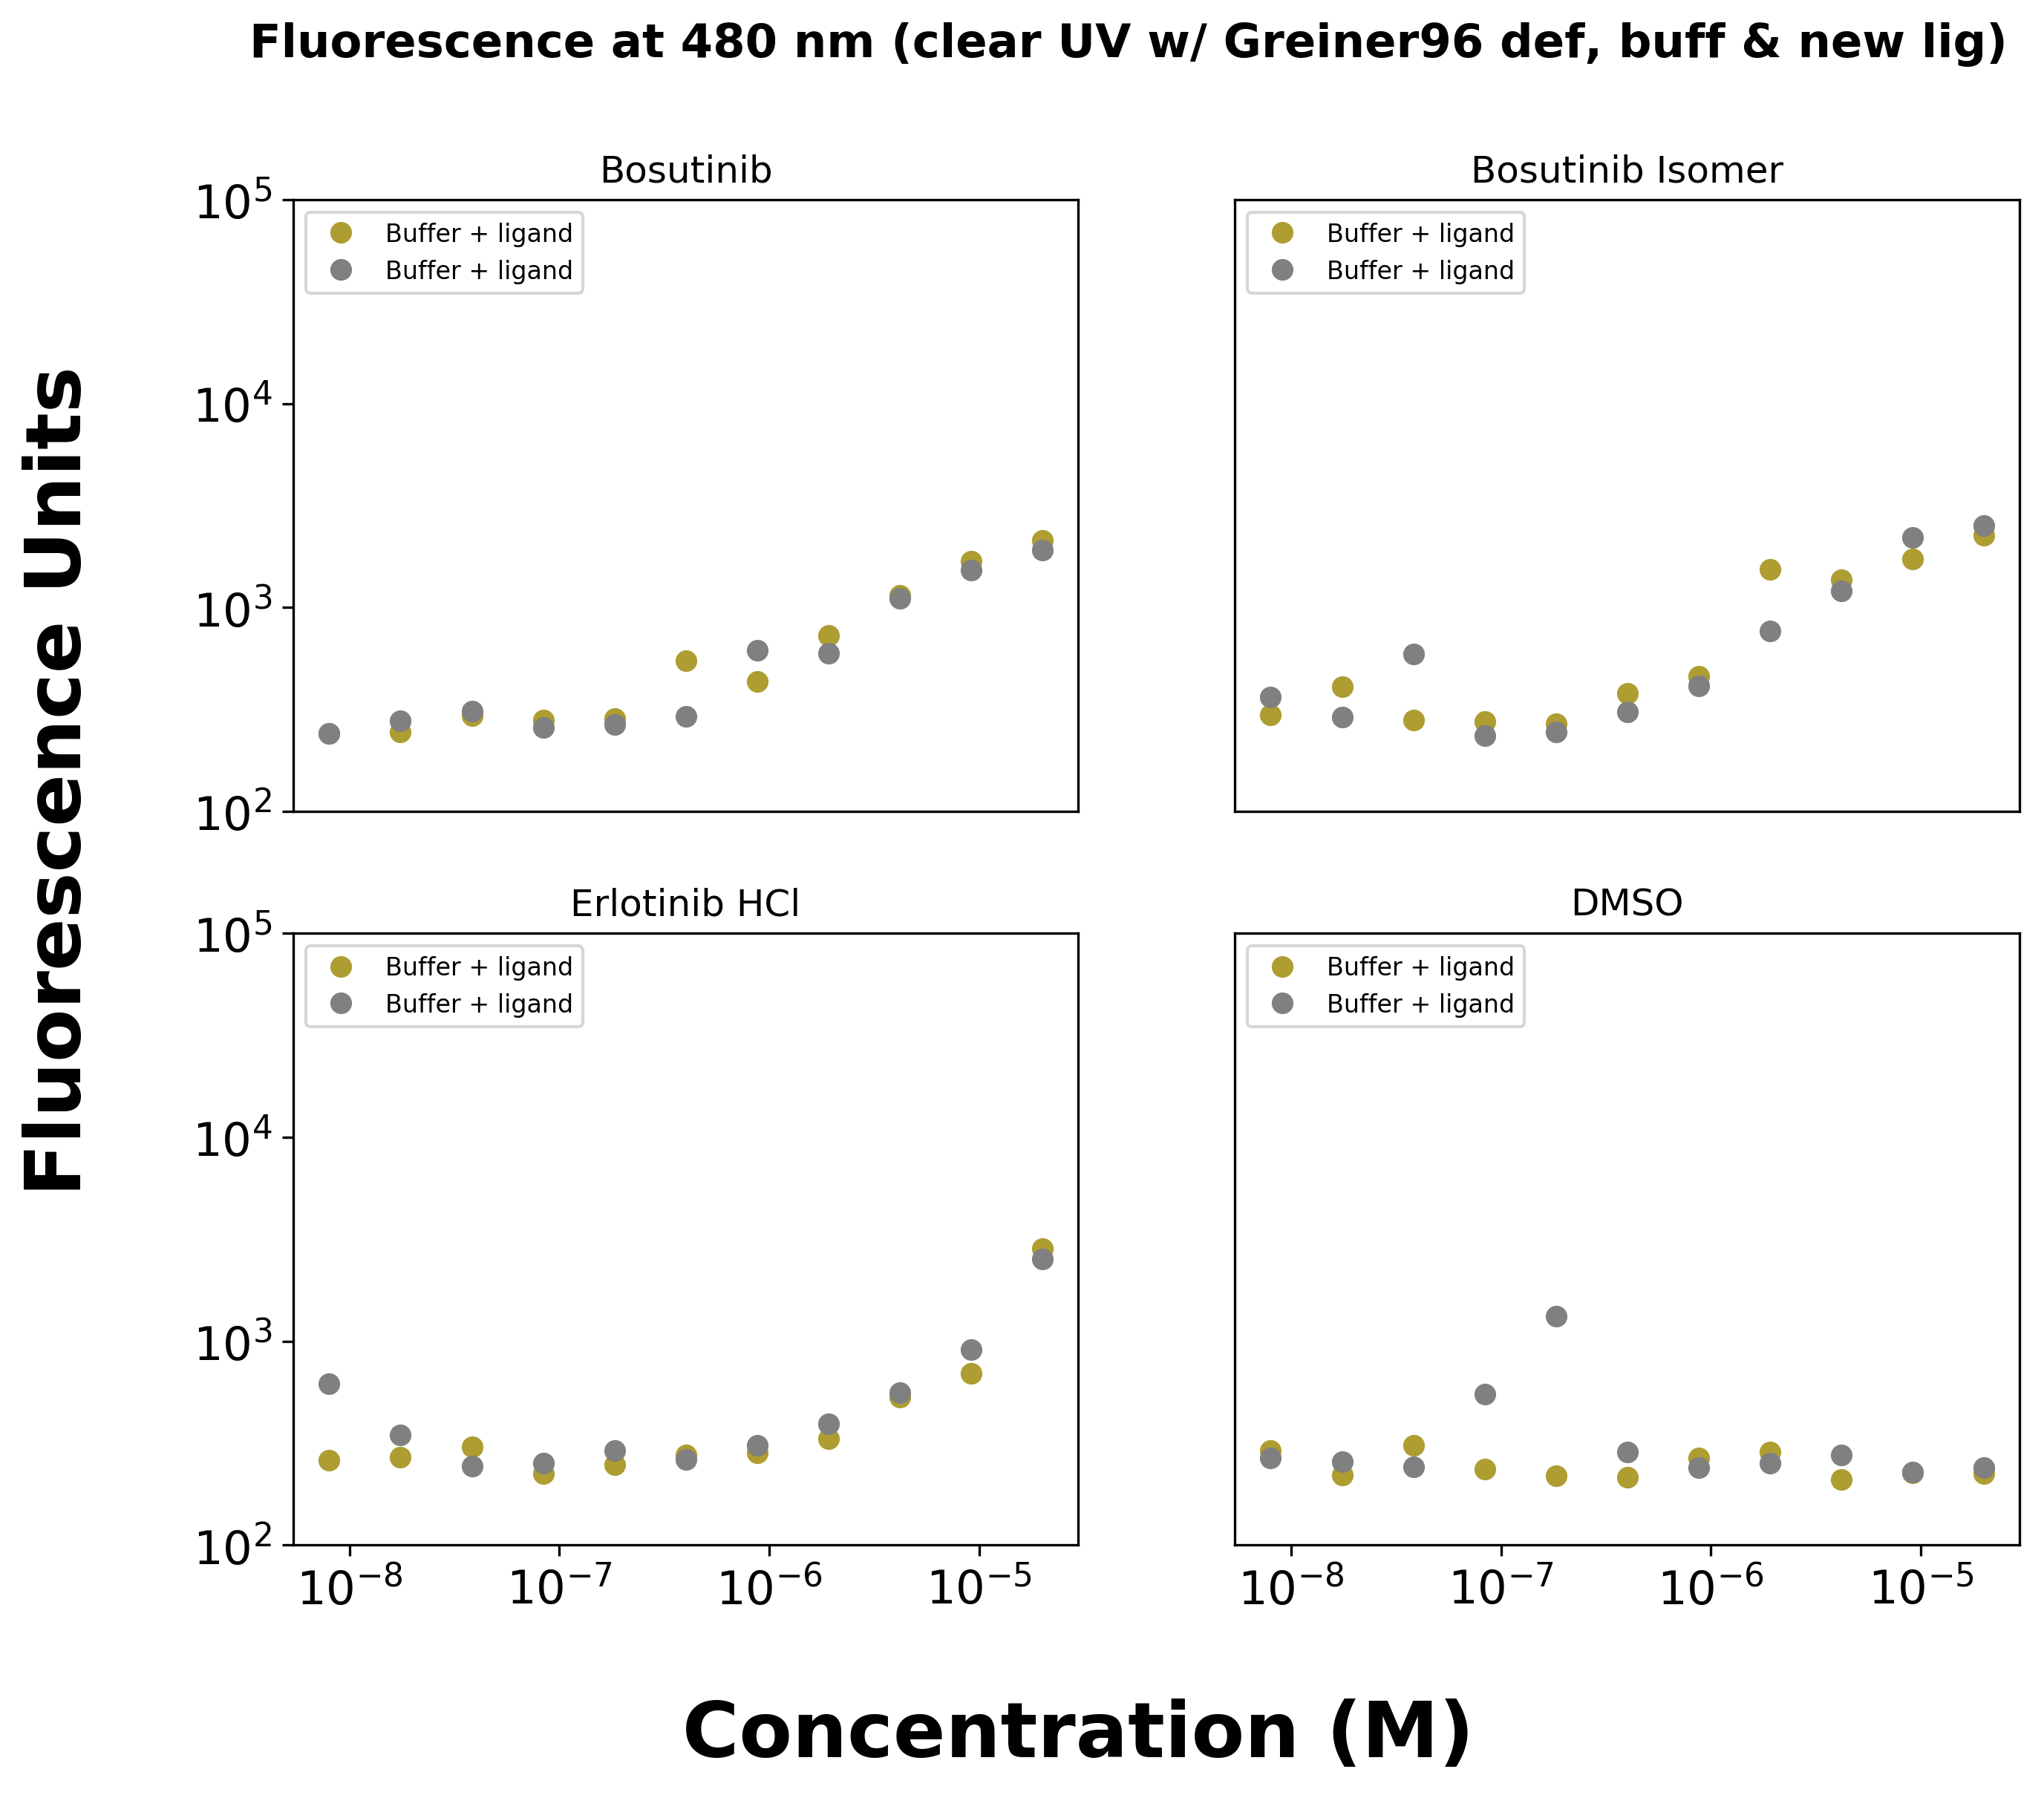

In [5]:
## make 4 plots, one for each ligand at all wavelengths
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[2]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (clear UV w/ Greiner96 def, buff & new lig)', fontsize=15, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
# Plot fluorescence
plt.loglog(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.minorticks_off()
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)
    

# Plot fluorescence
ax1 = fig.add_subplot(2,2,4)
plt.loglog(concentrations, np.flip(Gef_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Gef_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(100, 100000)
ax1.yaxis.set_ticks([])
plt.minorticks_off()

ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['Buffer + ligand', 'Buffer + ligand'], loc=2, prop={'size': 8})
plt.title('DMSO')
    


fig.savefig('20181206_clear_UV_Greiner96_def_buffer_new_lig_loglog_%s.pdf' % wavelength, dpi=300)